In [1]:
import numpy as np
from datasets import EliaSolarDataset
dataset = EliaSolarDataset("data/solar_data.csv", "DateTime", "Corrected Upscaled Measurement [MW]", context_length=30, frequency="15min", train_test_split_year=2021,train_val_split_year=2020)
df = dataset.get_dataframe()

c:\Repositories\OpenUniversiteit\dne\code\datasets.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.target_column] = self.scaler.fit_transform(df[[self.target_column]]).flatten()


<Axes: >

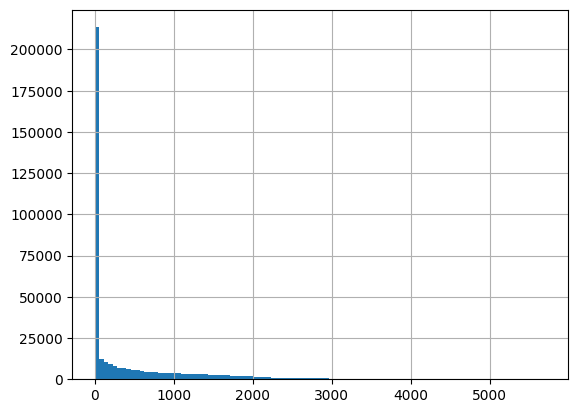

In [2]:
# As you can see the target column is not normally distributed
df["Corrected Upscaled Measurement [MW]"].hist(bins=100)

In [2]:
import pandas as pd
from typing import *
import os
import building_blocks
from utils import ConfigSettings


from importlib import reload
reload(building_blocks)
from building_blocks import *

frequencies = ["D", "4h", "1h"]
layers = [2, 4, 6]
heads = [4, 8]
forward_expansions = [256, 512]

with open('table-validation-losses.txt', 'w') as f:
    f.write(f"| layers | heads | forward expansion | average | stddev |{os.linesep}")
    f.write(f"|--:|--:|--:|--:|--:|{os.linesep}")
    for freq, layer, head, forward_expansion in ([(frequency, num_layer, head, forward_expansion) for frequency in frequencies for num_layer in layers for head in heads for forward_expansion in forward_expansions]):
        validation_losses = f"./weights/elia-base-transformer-freq{freq}-layers{layer}-heads{head}-fe{forward_expansion}_train_val_losses.pkl"
        if (not os.path.exists(validation_losses)):
            print(f"could not find validation losses {validation_losses}")
        else:
            data = pd.read_pickle(validation_losses)
            f.write(f"| {layer} | {head} | {forward_expansion} | {data["validation"].mean():.4f} | {data["validation"].std():.4f} |{os.linesep}")

    f.write(f"{os.linesep}")
    f.write(f"Table: Average validation losses for base transformer hyperparameter variations \\label{{table:avg-validation-losses-base-transformer}}")

print("done")


could not find validation losses ./weights/elia-base-transformer-freqD-layers2-heads4-fe512_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freqD-layers2-heads8-fe512_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freqD-layers4-heads4-fe512_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freqD-layers4-heads8-fe512_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freq4h-layers2-heads4-fe512_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freq4h-layers2-heads8-fe256_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freq4h-layers2-heads8-fe512_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freq4h-layers4-heads4-fe256_train_val_losses.pkl
could not find validation losses ./weights/elia-base-transformer-freq4h-layers4-heads4-fe512